# `Sentiment Analysis of New York Times Data` : with Python

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome

`Example 01:`
+ Parse Text, remove stopwords, punctuation and symbols.

+ Evaluate frequency of words in each text heading and abstract

`Example 02:`
+ Use `Vader` to obtain a score for each piece of text to determine the tone of the article such as (Positive, Negative or Neutral)

+ Outcome: will be using basics of `nltk` and parsing textual data for *`nlp`*


In [30]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
import string, re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties # position legend outside plot
import datetime

# Ideas & Context: 

A few things to consider: `the tone, complexity, colloquial terms and context are very important`. Are you evaluating occurance of individual words, words next to each other, entire sentences or documents of text. This can get extremely complex and multiple types of analysis may need to be overlayed to get an idea of what is going on. 

A specific term in a normal conversation can mean something different when talking to someone in a specific domain. For example, if I am talking to a friend vs talking to a statistician or economics person. Now the meaning of a words or sentence can carry a different tone or meaning for interpretation as well. 

`Bag of Words (BOW)`: occurance of words in a document

+ There is no context of the word, its significance, the order it occured or its part of speech.

`VADER`: *Valence Aware Dictionary and sEntiment Reasoner*, this is a 
`sentence level classifier, based on a list of words with scores designating if it is either (positive, negative or neutral)`. This is a rules based approach and will rate each word and then give an overall of the sentence. 

+ Context of the sentence will be captured by the punctuation, capitalization, modifiers,
conjugation and prior tri-gram. 

+ This type of analysis best works with shorter texts and social media posts


**Overall, domain specific approaches need to be considered because there are NO one fits all method.**

`--------------------------------`

**`Disclamer`**: *Always, remember that each problem you solve is different! My code can be an aid in looking at a problem or give you idea. NOT solve every instance.*


# This is a dataset from the New York Times API (*Most Popular*) articles for a specified time period.

We will be looking at two ways to deal with these data

In [13]:
NY_Times_articles=pd.read_csv('NYTimes_articles.csv')

print('Media: ',NY_Times_articles['media'][0])
print('```````````')
print('Title: ',NY_Times_articles['title'][0])
print('````````````')
print('Abstract: ',NY_Times_articles['abstract'][0])

NY_Times_articles.head()

Media:  Michael Reinoehl was killed by a federally led fugitive task force in Lacey, Wash., on Thursday. He was being investigated in a fatal shooting at a Portland protest.
```````````
Title:  Suspect in Fatal Portland Shooting Is Killed by Officers During Arrest
````````````
Abstract:  Law enforcement agents killed Michael Forest Reinoehl while trying to arrest him, four officials said. He was being investigated in the fatal shooting of a supporter of a far-right group.


,source,published_date,adx_keywords,byline,title,abstract,des_facet,per_facet,media
0,New York Times,2020-09-03,"Murders, Attempted Murders and Homicides;Antif...","By Hallie Golden, Mike Baker and Adam Goldman",Suspect in Fatal Portland Shooting Is Killed b...,Law enforcement agents killed Michael Forest R...,"['Murders, Attempted Murders and Homicides', '...","['Reinoehl, Michael (1972-2020)', 'Danielson, ...",Michael Reinoehl was killed by a federally led...
1,New York Times,2020-09-05,Boats and Boating;Parades;Maritime Accidents a...,By Bryan Pietsch and Aimee Ortiz,At Least 4 Boats Sink During ‘Trump Boat Parad...,No injuries were immediately reported at the e...,"['Boats and Boating', 'Parades', 'Maritime Acc...","['Trump, Donald J']",Owners of boats of “all shapes and sizes” were...
2,New York Times,2020-08-24,Comedy and Humor;Coronavirus (2019-nCoV);New Y...,By Jerry Seinfeld,Jerry Seinfeld: So You Think New York Is ‘Dead’,(It’s not.),"['Comedy and Humor', 'Coronavirus (2019-nCoV)']",[],NaN
3,New York Times,2020-08-27,"Murders, Attempted Murders and Homicides;Demon...","By Haley Willis, Muyi Xiao, Christiaan Trieber...",Tracking the Suspect in the Fatal Kenosha Shoo...,Footage appears to show a teenager shooting th...,"['Murders, Attempted Murders and Homicides', '...","['Rittenhouse, Kyle', 'Blake, Jacob (August 23...",NaN
4,New York Times,2020-08-27,Hurricane Laura (2020);Deaths (Fatalities);Pow...,NaN,Hurricane Laura Kills at Least 6 People in Lou...,After landfall overnight with 150 m.p.h. winds...,"['Hurricane Laura (2020)', 'Deaths (Fatalities...",[],NaN


# `First Part`: Lets Parse the data

`-------------------------------`

# `Tokenizer`: this will split our data into sentences or words depending on what you have. 

In our case we have headlines and abstract of each article

In [14]:
# Subset and take only columns of interest:
cols=['title','abstract','media']
text_to_format=NY_Times_articles.loc[:,cols]
# for i in text_to_format.it:
#     print(i)

# A few things we need to do:

1 . ) `remove punctuation and symbols`

2 . ) `convert to lower case`

**ex. )** This only returns what we searched

pattern = '[ { } ]'.format( re.escape( string.punctuation ) )

re.findall( pattern," ... Hi there. AADD?()DGF'G ")

`Output`: ['.', '.', '.', '.', '?', '(', ')', "'"]

**ex. )** This will keep everything except what we don't want

s= ' pepepepe ... 9ewrewnrer9df9gfd9g 0000 '

''.join([i for i in s if not i.isdigit()])

`Output`: 'pepepepe ... ewrewnrerdfgfdg '

`------------------------`

In [15]:
store_lowercase_list_lists_strings=[]
key_val_forDF=defaultdict(list)
h=[]
for i in text_to_format.items(): # convert df_to_dict
    for j in i[1]:
        '''
        This if/else: we are searching for a string of words if it is there then 
        we will use our tokenizer to split our words. We are taking i[0] which 
        is the key we will have. Then we will convert the string to lowercase,
        remove digits and finally split words
        '''
        if type(j)==str:
            tokenizer = nltk.RegexpTokenizer(r'\w+') # take words and split
#             tokenizer_=nltk.tokenize.WordPunctTokenizer()
#             h.append([i[0],tokenizer_.tokenize(j.lower())])
            store_lowercase_list_lists_strings.append([i[0],tokenizer.tokenize(''.join([i for i in j.lower() if not i.isdigit()]))])

        else: # if a NaN
            h.append([i[0],'Nope'])
            store_lowercase_list_lists_strings.append([i[0],'Nada'])

            
# Create key:[vals]
for j in store_lowercase_list_lists_strings:
    key_val_forDF[j[0]].append(j[1])

pd.DataFrame(key_val_forDF)

# cc=defaultdict(list)
# for j in h:
#     cc[j[0]].append(j[1])
# pd.DataFrame(cc)

,title,abstract,media
0,"[suspect, in, fatal, portland, shooting, is, k...","[law, enforcement, agents, killed, michael, fo...","[michael, reinoehl, was, killed, by, a, federa..."
1,"[at, least, boats, sink, during, trump, boat, ...","[no, injuries, were, immediately, reported, at...","[owners, of, boats, of, all, shapes, and, size..."
2,"[jerry, seinfeld, so, you, think, new, york, i...","[it, s, not]",Nada
3,"[tracking, the, suspect, in, the, fatal, kenos...","[footage, appears, to, show, a, teenager, shoo...",Nada
4,"[hurricane, laura, kills, at, least, people, i...","[after, landfall, overnight, with, m, p, h, wi...",Nada
5,"[black, panther, star, chadwick, boseman, dies...","[the, actor, also, played, groundbreaking, fig...","[the, actor, chadwick, boseman, in, he, was, w..."
6,"[your, coronavirus, test, is, positive, maybe,...","[the, usual, diagnostic, tests, may, simply, b...","[tests, authorized, by, the, f, d, a, provide,..."
7,"[one, person, dead, in, portland, after, clash...","[a, man, affiliated, with, a, right, wing, gro...","[i, can, t, get, in, to, edit, the, digital, c..."
8,"[a, smoking, gun, infectious, coronavirus, ret...","[airborne, virus, plays, a, significant, role,...","[doctors, in, johannesburg, demonstrated, how,..."
9,"[scientists, see, signs, of, lasting, immunity...","[new, research, indicates, that, human, immune...","[medical, workers, taking, a, blood, test, for..."


`--------------------------------`

# `Stopwords`: we will get rid of useless words

+ The problem we have now is that there are words that will not come up in our dictionary and are split: such as 'G.O.P',"Qanon",'FDA','N.Y.C' we will need to take care of these and replace them.

1.) I could ignore them here since this is an exercise

2.) We could find all words that are abbreviations or acronyms and create a lists of words to handle them. But, will they have any effect on the analysis today?

`----------------------`

`Side Note`: very important consideration, please read

We do have a pickle of a problem don't we? It is not easy to take care of this problem. There are areas of research dealing with just this scenario: such as Medical/Biomedical abbreviations and acronyms. 

+ One algorithm to approach this would be: https://psb.stanford.edu/psb-online/proceedings/psb03/schwartz.pdf
It is assuming in fact that the actual words was indeed mentioned in the text at some point prior and you can find it. `But, we are not in luck here since these are captions of text and not complete documents. We have social media headlines and abstracts to articles`.

Code option, but have not verified: https://github.com/philgooch/abbreviation-extraction

# **For Brevity** I will ignore the abbreviated/acronyms today

`----------------------`

In [16]:
stopwords = nltk.corpus.stopwords.words('english')

vv=[]
for i in store_lowercase_list_lists_strings:
#     print(i)
    if i[1]=='Nada':
        vv.append([i[0],[]])
    else:
        vv.append([i[0],[w for w in i[1] if w not in stopwords]])
y=defaultdict(list)
for i in vv:
    y[i[0]].append(i[1])
pd.DataFrame(y)

,title,abstract,media
0,"[suspect, fatal, portland, shooting, killed, o...","[law, enforcement, agents, killed, michael, fo...","[michael, reinoehl, killed, federally, led, fu..."
1,"[least, boats, sink, trump, boat, parade, texa...","[injuries, immediately, reported, event, takin...","[owners, boats, shapes, sizes, encouraged, par..."
2,"[jerry, seinfeld, think, new, york, dead]",[],[]
3,"[tracking, suspect, fatal, kenosha, shootings]","[footage, appears, show, teenager, shooting, t...",[]
4,"[hurricane, laura, kills, least, people, louis...","[landfall, overnight, p, h, winds, laura, ripp...",[]
5,"[black, panther, star, chadwick, boseman, dies...","[actor, also, played, groundbreaking, figures,...","[actor, chadwick, boseman, appeared, first, pr..."
6,"[coronavirus, test, positive, maybe]","[usual, diagnostic, tests, may, simply, sensit...","[tests, authorized, f, provide, yes, answer, i..."
7,"[one, person, dead, portland, clashes, trump, ...","[man, affiliated, right, wing, group, shot, ki...","[get, edit, digital, column, police, officers,..."
8,"[smoking, gun, infectious, coronavirus, retrie...","[airborne, virus, plays, significant, role, co...","[doctors, johannesburg, demonstrated, place, d..."
9,"[scientists, see, signs, lasting, immunity, co...","[new, research, indicates, human, immune, syst...","[medical, workers, taking, blood, test, antibo..."


# We Still Have a Problem:

We stll have single letter words left over.

Did the nltk stopwords make a mistake?
`NOPE!`
if you do a check you will see that not all letters by themselves are considered stopwords

to verify this just do:

`for i in stopwords:
    if i =='p':
        print('yes') `

you will get a `blank` returned to you, because it is not in stopwords.

In [17]:
# get rid of the single characters now:
# line = ['word','a','b','c','d','e','f','g']
# line = [j for j in i[1] if len(j) > 1]
# line

In [18]:
vv=[]
for i in store_lowercase_list_lists_strings:
#     print(i)
    if i[1]=='Nada':
        vv.append([i[0],[]])
    else:
        line = [j for j in i[1] if len(j) > 1]
        vv.append([i[0],[w for w in line if w not in stopwords]])
y=defaultdict(list)
for i in vv:
    y[i[0]].append(i[1])
pd.DataFrame(y)

,title,abstract,media
0,"[suspect, fatal, portland, shooting, killed, o...","[law, enforcement, agents, killed, michael, fo...","[michael, reinoehl, killed, federally, led, fu..."
1,"[least, boats, sink, trump, boat, parade, texa...","[injuries, immediately, reported, event, takin...","[owners, boats, shapes, sizes, encouraged, par..."
2,"[jerry, seinfeld, think, new, york, dead]",[],[]
3,"[tracking, suspect, fatal, kenosha, shootings]","[footage, appears, show, teenager, shooting, t...",[]
4,"[hurricane, laura, kills, least, people, louis...","[landfall, overnight, winds, laura, ripped, no...",[]
5,"[black, panther, star, chadwick, boseman, dies...","[actor, also, played, groundbreaking, figures,...","[actor, chadwick, boseman, appeared, first, pr..."
6,"[coronavirus, test, positive, maybe]","[usual, diagnostic, tests, may, simply, sensit...","[tests, authorized, provide, yes, answer, infe..."
7,"[one, person, dead, portland, clashes, trump, ...","[man, affiliated, right, wing, group, shot, ki...","[get, edit, digital, column, police, officers,..."
8,"[smoking, gun, infectious, coronavirus, retrie...","[airborne, virus, plays, significant, role, co...","[doctors, johannesburg, demonstrated, place, d..."
9,"[scientists, see, signs, lasting, immunity, co...","[new, research, indicates, human, immune, syst...","[medical, workers, taking, blood, test, antibo..."


# Frequency Count of words for each list of lists

In this case it is irrelevant because these are only short captions of information. This would still be useful if we were to deal with paragraphs or more of information for each list.

In [19]:

g=[]
for i in vv:
    g.append([i[0],nltk.FreqDist(i[1])])
    
    
new_=defaultdict(list)
for i in g:
    new_[i[0]].append(i[1])

pd.DataFrame(new_)

,title,abstract,media
0,"{'suspect': 1, 'fatal': 1, 'portland': 1, 'sho...","{'law': 1, 'enforcement': 1, 'agents': 1, 'kil...","{'michael': 1, 'reinoehl': 1, 'killed': 1, 'fe..."
1,"{'least': 1, 'boats': 1, 'sink': 1, 'trump': 1...","{'injuries': 1, 'immediately': 1, 'reported': ...","{'owners': 1, 'boats': 1, 'shapes': 1, 'sizes'..."
2,"{'jerry': 1, 'seinfeld': 1, 'think': 1, 'new':...",{},{}
3,"{'tracking': 1, 'suspect': 1, 'fatal': 1, 'ken...","{'footage': 1, 'appears': 1, 'show': 1, 'teena...",{}
4,"{'hurricane': 1, 'laura': 1, 'kills': 1, 'leas...","{'landfall': 1, 'overnight': 1, 'winds': 1, 'l...",{}
5,"{'black': 1, 'panther': 1, 'star': 1, 'chadwic...","{'actor': 1, 'also': 1, 'played': 1, 'groundbr...","{'actor': 1, 'chadwick': 1, 'boseman': 1, 'app..."
6,"{'coronavirus': 1, 'test': 1, 'positive': 1, '...","{'usual': 1, 'diagnostic': 1, 'tests': 1, 'may...","{'tests': 1, 'authorized': 1, 'provide': 1, 'y..."
7,"{'one': 1, 'person': 1, 'dead': 1, 'portland':...","{'man': 1, 'affiliated': 1, 'right': 1, 'wing'...","{'get': 1, 'edit': 1, 'digital': 1, 'column': ..."
8,"{'smoking': 1, 'gun': 1, 'infectious': 1, 'cor...","{'airborne': 1, 'virus': 2, 'plays': 1, 'signi...","{'doctors': 1, 'johannesburg': 1, 'demonstrate..."
9,"{'scientists': 1, 'see': 1, 'signs': 1, 'lasti...","{'new': 1, 'research': 1, 'indicates': 1, 'hum...","{'medical': 1, 'workers': 1, 'taking': 1, 'blo..."


`--------------------------`

# `Second Part`: Analyze with `VADER`

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

# for line in headlines:
#     pol_score = sia.polarity_scores(line)
#     pol_score['headline'] = line
#     results.append(pol_score)

In [25]:
 '''
This if/else: we are searching for a string of words if it is there then 
we will use our tokenizer to split our words. We are taking i[0] which 
is the key we will have. Then we will convert the string to lowercase,
remove digits and finally split words
'''
for i in text_to_format.items(): # convert df_to_dict
    for j in i[1]:
        if type(j)==str:
            tokenizer = nltk.RegexpTokenizer(r'\w+') # take words and split
#             tokenizer_=nltk.tokenize.WordPunctTokenizer()
#             h.append([i[0],tokenizer_.tokenize(j.lower())])
            store_lowercase_list_lists_strings.append([i[0],tokenizer.tokenize(''.join([i for i in j.lower() if not i.isdigit()]))])

        else: # if a NaN
            h.append([i[0],'Nope'])
            store_lowercase_list_lists_strings.append([i[0],'Nada'])

In [26]:
yay=[]
oh_yay=[]
for i in text_to_format.items(): # convert df_to_dict
    for j in i[1]:
#         pol_score = sia.polarity_scores(j)
#         print(pol_score)
#         print(type(j))
        

        if type(j)==str:
            pol_score = sia.polarity_scores(j)
            yay.append([i[0],pol_score])
            oh_yay.append([i[0],pol_score['compound']])
        else:
            yay.append([i[0],'Nope'])
            oh_yay.append([i[0],'Nope'])

b=defaultdict(list)            
for i in yay:
    b[i[0]].append(i[1])
pd.DataFrame(b)
 

,title,abstract,media
0,"{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...","{'neg': 0.285, 'neu': 0.658, 'pos': 0.058, 'co...","{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Nope
3,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...","{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",Nope
4,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...","{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...",Nope
5,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...","{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp..."
6,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.073, 'neu': 0.801, 'pos': 0.125, 'co..."
7,"{'neg': 0.343, 'neu': 0.497, 'pos': 0.16, 'com...","{'neg': 0.164, 'neu': 0.73, 'pos': 0.106, 'com...","{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'comp..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.085, 'neu': 0.769, 'pos': 0.146, 'co...","{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp..."
9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.119, 'neu': 0.79, 'pos': 0.091, 'com...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [27]:
b=defaultdict(list)            
for i in oh_yay:
    b[i[0]].append(i[1])
pd.concat([pd.DataFrame(b),NY_Times_articles.published_date],axis=1)
NY_Times_articles['published_date']

0     2020-09-03
1     2020-09-05
2     2020-08-24
3     2020-08-27
4     2020-08-27
5     2020-08-28
6     2020-08-29
7     2020-08-30
8     2020-08-11
9     2020-08-16
10    2020-08-15
11    2020-09-03
12    2020-09-04
13    2020-08-28
14    2020-08-26
15    2020-08-12
16    2020-08-28
17    2020-09-08
18    2020-08-18
19    2020-08-26
Name: published_date, dtype: object

In [37]:
scores_avg_df=pd.concat([pd.DataFrame(b),NY_Times_articles.published_date],axis=1)

# needed to convert to date for plotting
scores_avg_df['published_date']=pd.to_datetime(scores_avg_df['published_date'])

# *`Plot the score for each day to see how the daily articles looked for the mood`*

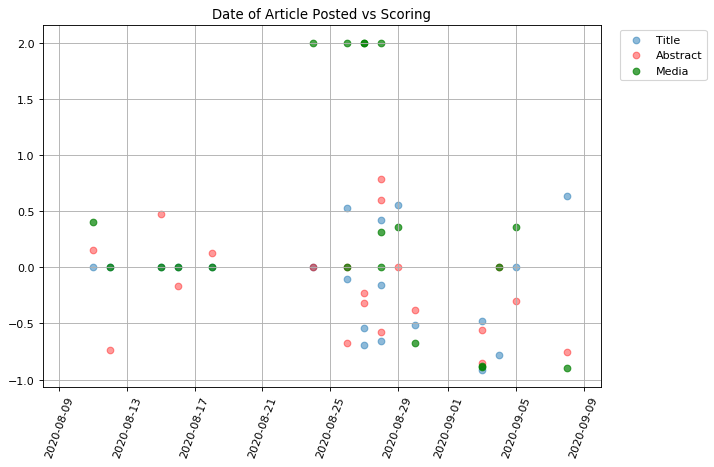

In [38]:

# plot dim
fig=plt.figure(figsize=(9, 6), dpi=80)
#layer plot for multiple scatter on top of each other
ax = fig.add_subplot(1,1,1)

dta=scores_avg_df.loc[:,["published_date","title"]]

ax.scatter(dta["published_date"],dta['title'],
           label="Title",alpha = .5)

# change x-lim to fit graph
plt.xlim(datetime.date(2020, 8, 8), datetime.date(2020, 9, 10))

# rotate labels of x
plt.xticks(rotation=70)
ax.scatter(scores_avg_df["published_date"],
           scores_avg_df['abstract'],c='red',label="Abstract",alpha = .4)

# due to strings that didn't have values I made up something out of [-1,1] so I can 
# know it wasn't part of our data but still have same number of points to plot
media=[]
for i in scores_avg_df['media']:
#     print(type(i))
    if i=='Nope':
        media.append(2)
    else:
        media.append(i)
    
ax.scatter(scores_avg_df["published_date"],media,c='green',label="Media",alpha = .7)

# position legend outside of plot
fontP = FontProperties()
fontP.set_size('medium')
ax.legend( loc='upper right',prop=fontP,bbox_to_anchor=(1.2, 1))

# grid for plot
plt.grid();


plt.title('Date of Article Posted vs Scoring')
#gets rid of annoying array stuff printed
plt.show()

`Closing Remarks`:

From around August 26, 2020 until September 8,2020 the `Most Popular` articles of New York Times had a mostly NEGATIVE sentiment. 

Now, comparing the same article but looking at the title, abstract and media response.

There is clearly and message here: But what is it?

You have to look at the actual numbers and evaluate line by line. 

+ When `Abstract & Media` are compared side-by-side: if Abstract is positive then Title will be on the same track and vice versa. 

+ Comparing `Abstract and Title` are on the same page as above but usually media will have a more positive or negaitive value than the abstract.


+ `Media vs Title`: same thing


`Oddities`: two particular entries are complete odd balls. lets investigate those

In [40]:
print('Title score: {} &\n'.format(scores_avg_df.iloc[5,0]),
      'title text: {}'.format(NY_Times_articles.iloc[5,4]))
print('-------------------------')
print('Media score: {} &\n'.format(scores_avg_df.iloc[5,2]),
      'media text: {}'.format(NY_Times_articles.iloc[5,8]))

Title score: -0.6597 &
 title text: ‘Black Panther’ Star Chadwick Boseman Dies of Cancer at 43
-------------------------
Media score: 0.3182 &
 media text: The actor Chadwick Boseman in 2018. He was 35 when he appeared in his first prominent role, as Jackie Robinson.


In [41]:
print('Title score {} & \n'.format(scores_avg_df.iloc[17,0])
      ,'title text: {}'.format(NY_Times_articles.iloc[17,4]))
print('-------------------------')
print('Media score" {}: &\n'.format(scores_avg_df.iloc[17,2]),
      'Media text: {}'.format(NY_Times_articles.iloc[17,8]))

Title score 0.6369 & 
 title text: Justice Dept. Intervenes to Help Trump in E. Jean Carroll Defamation Lawsuit
-------------------------
Media score" -0.9001: &
 Media text: E. Jean Carroll, a writer who has accused President Trump of raping her, sued him last November, claiming that he lied by publicly denying he had ever met her.


# <font color=red size=6>LIKE</font>, Share &

# <font color=red size=6>SUB</font>scribe

# <font size=6>Citations & Help</font>:

# <font size=7>◔̯◔</font>

https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

https://towardsdatascience.com/https-towardsdatascience-com-algorithmic-trading-using-sentiment-analysis-on-news-articles-83db77966704

http://www.rychdata.com/google-natural-language-api-analyzing-live-news-sentiment-in-python.html

https://www.sciencedirect.com/science/article/pii/S2090447914000550 [if you want a good read]

https://opensource.com/article/19/4/social-media-sentiment-analysis-python (beginner read)

https://opensource.com/article/19/4/social-media-sentiment-analysis-python-scalable (exercise)

https://www.frbsf.org/economic-research/files/wp2017-01.pdf

https://www.youtube.com/watch?v=bsv_pCFAAuQ

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend

https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot